In [1]:
from tensorflow.keras.preprocessing import image
from util import *
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import reshape
import tensorflow as tf
import math

In [47]:
path_pb = "../tst/mobilenet_remove_identity.pb"
path_img_dog = "../tst/img/dog.jpg"

**Input the layer name**

In [63]:
layer_name = "import/MobilenetV1/MobilenetV1/Conv2d_10_depthwise/Relu6"

In [64]:
graph_def = loadFrozenModel(path_pb)
util = AxfcTFGraphUtil(graph_def)

sub = util.extract_sub_graph_from_begin(graph_def, [layer_name])

tf.compat.v1.disable_eager_execution()
with tf.Graph().as_default() as sub_graph:
    tf.import_graph_def(sub, name='')
    
conv_tensor = sub_graph.get_tensor_by_name('{}:0'.format(layer_name))

img_dog = image.load_img(path_img_dog, target_size=(224, 224))
img_array = image.img_to_array(img_dog)
img_array_expanded_dims = np.expand_dims(img_array/255.0, axis=0)

with tf.compat.v1.Session(graph=sub_graph) as sub_sess:
    result = sub_sess.run(conv_tensor , feed_dict={
        'import/input:0' : img_array_expanded_dims
    })
np_result = np.array(result)

tf_result = np_result.reshape(1,conv_tensor.shape[1],conv_tensor.shape[2],conv_tensor.shape[3])

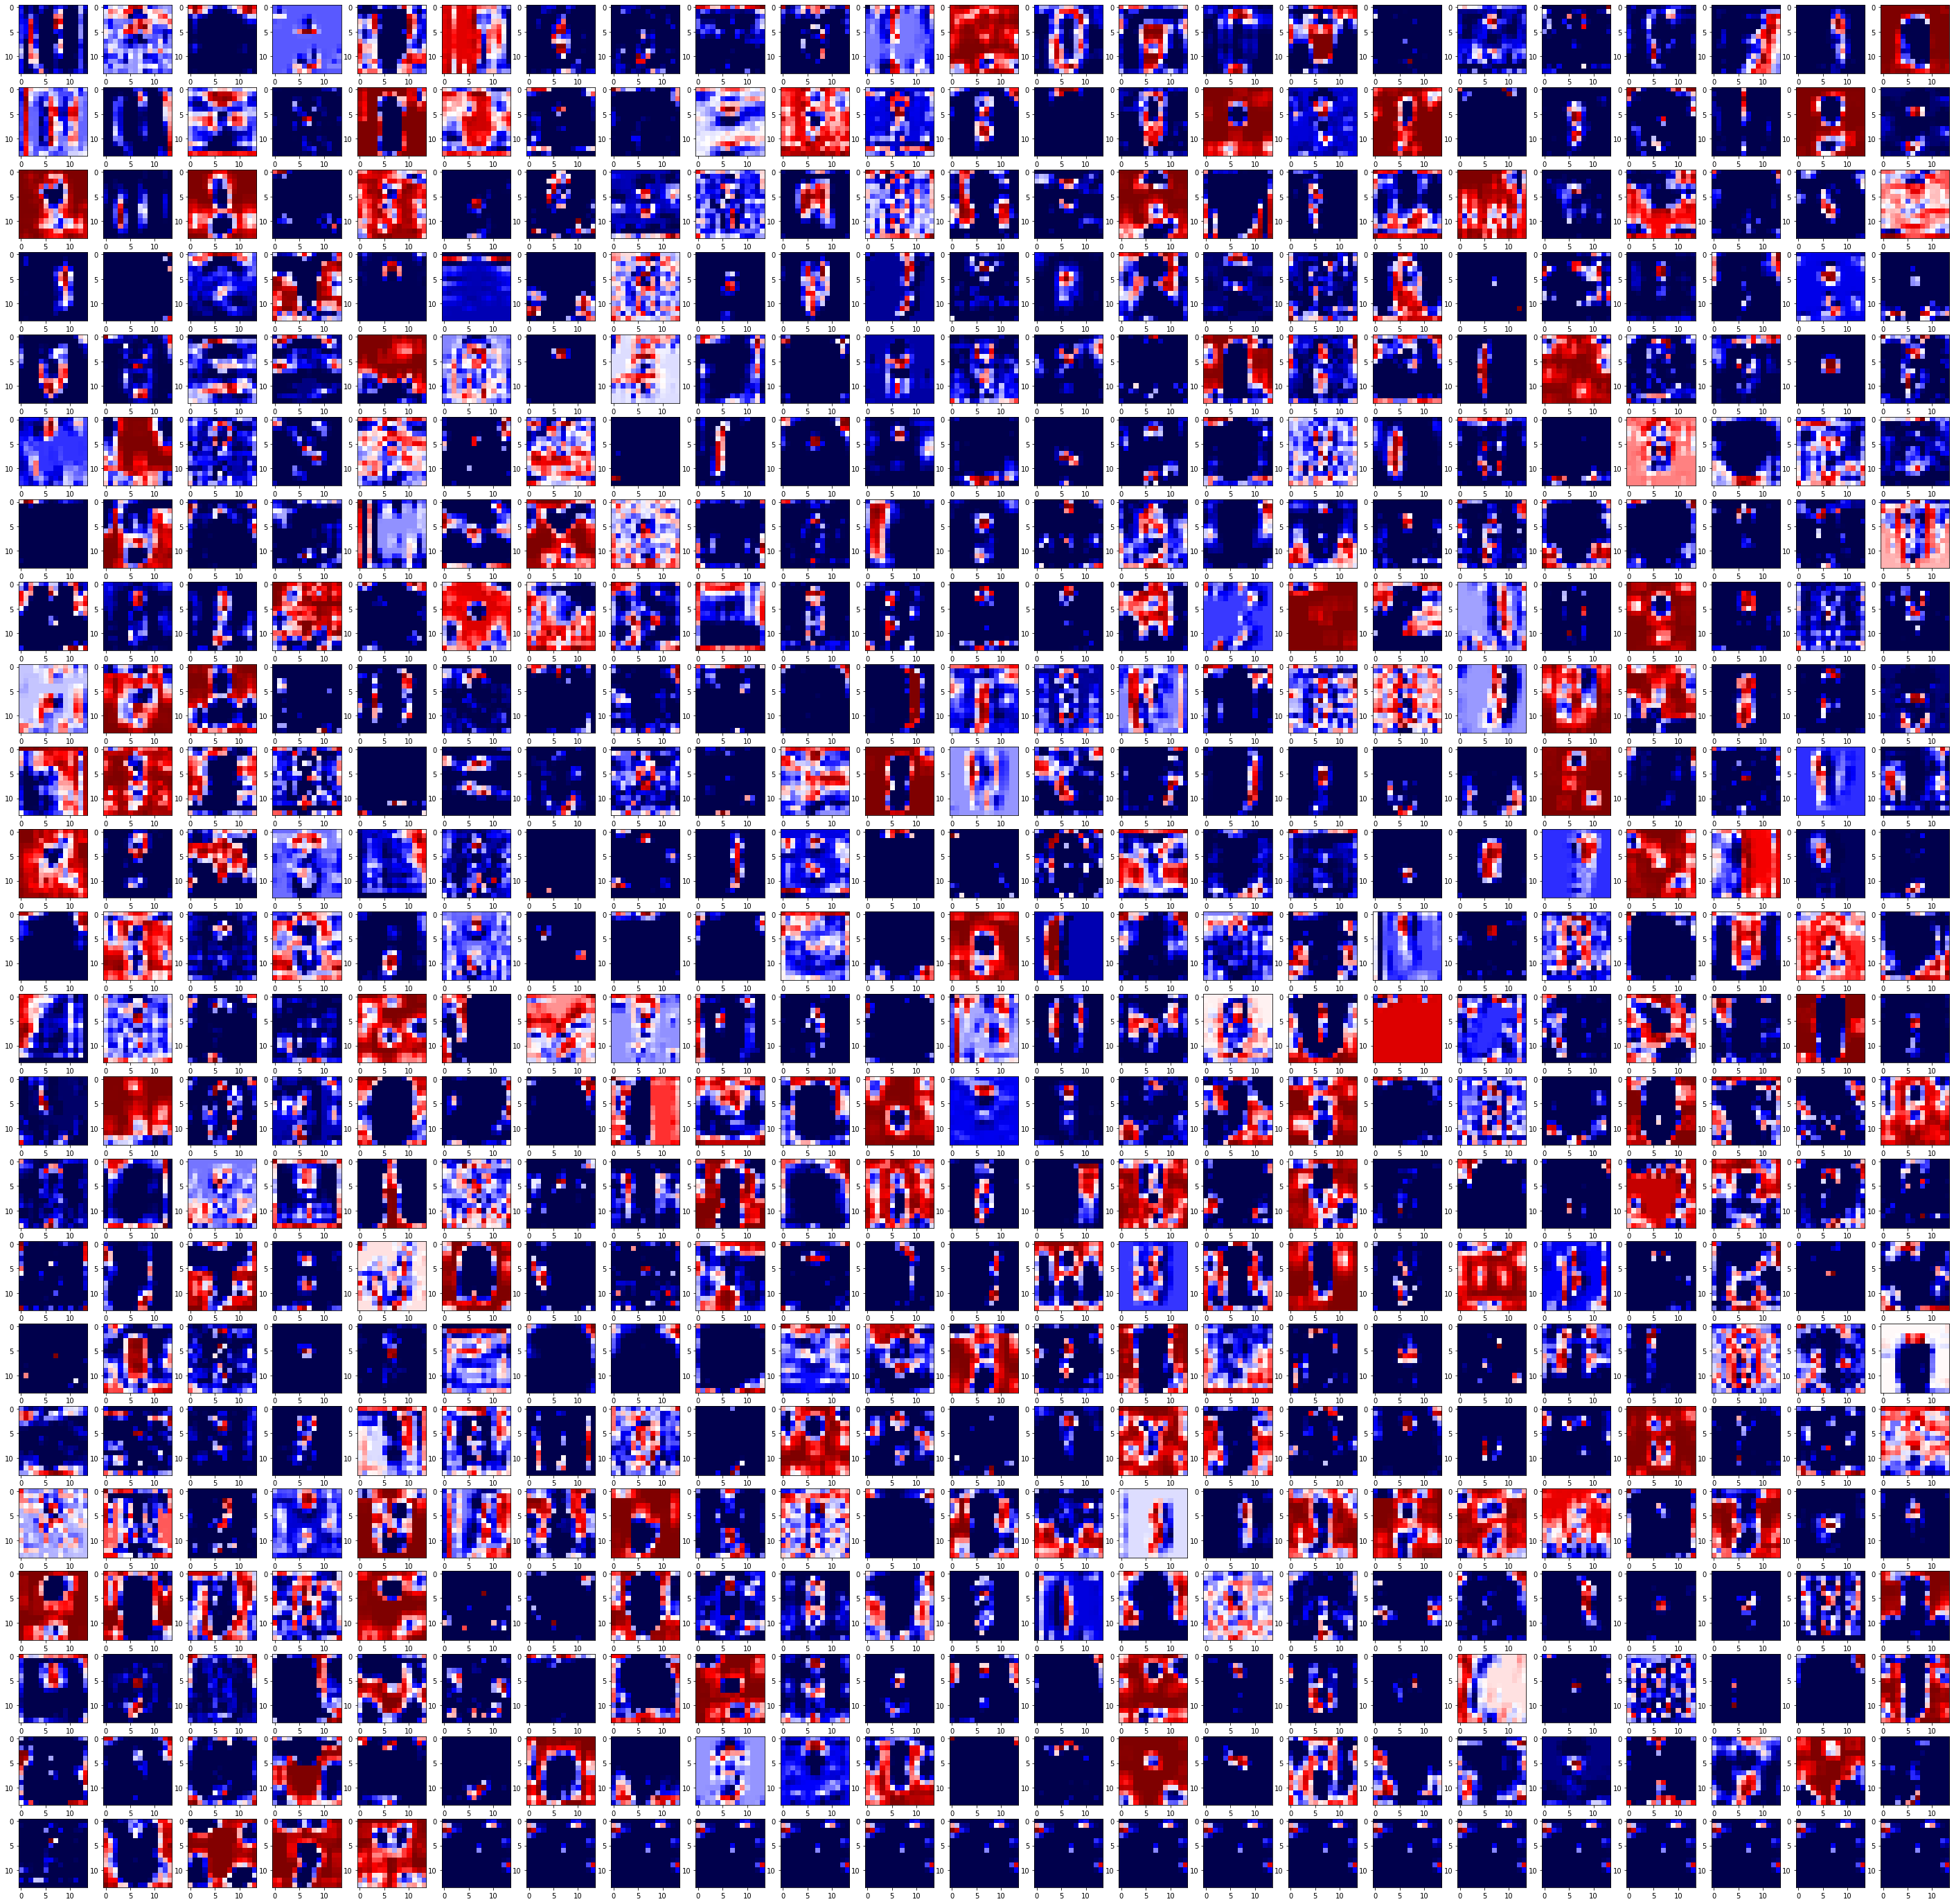

import/MobilenetV1/MobilenetV1/Conv2d_10_depthwise/Relu6


In [65]:
num_chnls = tf_result.shape[3]
grids = math.ceil(math.sqrt(num_chnls))
fig, axes = plt.subplots(grids, grids,figsize=(50, 50))

for i, ax in enumerate(axes.flat):
    if i<num_chnls:
        im = tf_result[0,:, :,  i]
    ax.imshow(im, interpolation='nearest', cmap='seismic')
plt.show()
print(layer_name)